# Lecture 10 - Loading and Visualizing GloVe

In [1]:
import os
import os.path
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt

I'm loading [GloVe](https://nlp.stanford.edu/projects/glove/) from google drive since it is attached to colab. You can find a url to the pre-trained embedding below or go to the GloVe's website to download it.

In [2]:
from google.colab import drive

drive.mount('/content/drive')
base = """/content/drive/MyDrive/GloVe"""
assert os.path.exists(base)

if not os.path.exists(os.path.join(base, "glove.6B.zip")):
  !wget http://nlp.stanford.edu/data/glove.6B.zip
  !mv glove.6B.zip drive/MyDrive/GloVe/

!unzip -l drive/MyDrive/GloVe/glove.6B.zip

Mounted at /content/drive
Archive:  drive/MyDrive/GloVe/glove.6B.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
171350079  2014-08-04 20:15   glove.6B.50d.txt
347116733  2014-08-04 20:14   glove.6B.100d.txt
693432828  2014-08-04 20:14   glove.6B.200d.txt
1037962819  2014-08-27 19:19   glove.6B.300d.txt
---------                     -------
2249862459                     4 files


There are several versions avalible, so I have to choose one.

In [3]:
n_vocab = 400000
n_dim = 200

import zipfile
import io

idx2voc = list()
GloVe = np.zeros((n_vocab, n_dim))
with zipfile.ZipFile(os.path.join(base, "glove.6B.zip")) as archive:
  with archive.open("glove.6B.%id.txt" % n_dim) as raw:
    for n, line in tqdm(enumerate(io.TextIOWrapper(raw, encoding=None, newline='\n')), 
                     total=n_vocab, desc="Loading vectors"):
      tokens = line.split(' ')
      idx2voc.append(tokens[0])
      GloVe[n, :] = np.asarray(tokens[1:], dtype=np.float32)
vocabulary = set(idx2voc)
voc2idx = {word:n for n, word in enumerate(idx2voc)}

Loading vectors: 100%|██████████| 400000/400000 [00:31<00:00, 12734.32it/s]


In [6]:
GloVe[voc2idx['silence'], :]

array([ 7.81289995e-01,  1.95999995e-01,  1.15180001e-01, -5.81499994e-01,
       -1.09669995e+00, -2.33909994e-01, -6.31049991e-01,  3.07779998e-01,
        2.00639993e-01,  1.07159996e+00,  3.17440003e-01,  3.20169985e-01,
       -5.62319994e-01, -1.26690000e-01,  3.58390003e-01, -5.06749988e-01,
       -2.47549996e-01,  7.51829982e-01, -3.15329999e-01,  4.39760014e-02,
        1.79869995e-01,  1.28760004e+00,  2.54559994e-01, -6.84159994e-01,
       -9.77779999e-02, -4.53449994e-01,  1.75990000e-01, -1.24799997e-01,
       -3.05480003e-01,  3.14830005e-01, -1.64309993e-01, -2.13890001e-01,
        2.76039988e-01,  3.00720006e-01, -1.01479995e+00, -6.48360014e-01,
       -1.48990005e-01,  1.93670005e-01,  3.81559998e-01, -1.85780004e-01,
        6.10140026e-01, -1.57710001e-01,  5.41459978e-01,  3.74119997e-01,
       -4.06899989e-01,  4.22100008e-01,  4.02420014e-01,  9.42669988e-01,
        2.52799988e-01, -1.68529991e-02,  2.70599991e-01,  2.86419988e-01,
        1.11469999e-01,  

## Word analogies

In [7]:
from sklearn.metrics import pairwise_distances

In [37]:
vec = lambda token: np.vstack(GloVe[voc2idx[token], :]).T

v = vec('star')

distances = pairwise_distances(GloVe, v, metric='euclidean').ravel()

for idx in np.argsort(distances)[:20]:
  print(idx2voc[idx], '\t', distances[idx])

star 	 0.0
stars 	 3.8225903699707438
superstar 	 5.220676558076345
alongside 	 6.026981028914708
veteran 	 6.037169848629846
legend 	 6.060596367666348
once 	 6.071650549231439
like 	 6.076475804202069
named 	 6.07712250346828
starred 	 6.077577935783381
turned 	 6.092562773162954
appeared 	 6.0965328280276
appears 	 6.099973619906431
hollywood 	 6.113614081243547
as 	 6.113906895069805
newcomer 	 6.11569846998341
hero 	 6.116005740568125
fame 	 6.130075701371151
best 	 6.148700905217092
man 	 6.156803785683631


In [14]:
import random
random.choices(list(vocabulary), k=20)

['admitting',
 'integra',
 'initializing',
 'monsoonal',
 'hizbullah',
 'public-school',
 'casco',
 'medium-pace',
 'doncasters',
 'stratos',
 'magmas',
 'parting',
 'isesaki',
 'eerdekens',
 'fleisig',
 'sup',
 'kaiserlautern',
 '73-75',
 'liana',
 'nastasia']

In [70]:
# v = vec('king')
v = vec('king') - vec('man') + vec('woman')
# v = vec('queen') + vec('man') - vec('woman')

distances = pairwise_distances(GloVe, v, metric='euclidean').ravel()

for idx in np.argsort(distances)[:20]:
  print(idx2voc[idx], '\t', distances[idx])

king 	 0.7042604306040586
queen 	 5.256927584849657
prince 	 5.415242229239351
monarch 	 5.463253010710028
kingdom 	 5.621511180803411
throne 	 5.808637217409268
reign 	 5.886935461583319
uncle 	 5.982255724499488
ii 	 5.988985645435528
crown 	 6.012373561394796
nephew 	 6.0877090368285165
cousin 	 6.161330447399032
iii 	 6.1692461766340365
brother 	 6.21298971862443
later 	 6.295843975895495
afterwards 	 6.300898549205696
latter 	 6.31596081226383
iv 	 6.322683596804751
mentioned 	 6.3288909280658014
accompanied 	 6.329484272009041


## Load a book

In [24]:
import nltk
nltk.download('gutenberg')
print(nltk.corpus.gutenberg.fileids())

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [25]:
books = ['carroll-alice.txt']
words = nltk.corpus.gutenberg.words(books)

In [47]:
text = """No more be grieved at that which thou hast done:
Roses have thorns, and silver fountains mud:
Clouds and eclipses stain both moon and sun,
And loathsome canker lives in sweetest bud.
All men make faults, and even I in this,
Authorizing thy trespass with compare,
Myself corrupting, salving thy amiss,
Excusing thy sins more than thy sins are;
For to thy sensual fault I bring in sense,
Thy adverse party is thy advocate,
And ‘gainst myself a lawful plea commence:
Such civil war is in my love and hate,
That I an accessary needs must be,
To that sweet thief which sourly robs from me."""

words = nltk.tokenize.wordpunct_tokenize(text)

In [48]:
words = [word.lower() for word in words if word.isalpha()]

tokencounts = dict()
for word in words:
  if word not in tokencounts.keys():
    tokencounts[word] = 1
  else:
    tokencounts[word] += 1

print("%i tokens in the text(s)" % len(tokencounts.keys()))

80 tokens in the text(s)


### POS tags for colour

We know that baseline POS taggers do quite well. Let's make one for the 
visualisation.

In [49]:
nltk.download('brown')
from nltk.corpus import brown
nltk.download('universal_tagset')

pos = dict()
for sentence in brown.tagged_sents(tagset='universal'):
  for n, (word, tag) in enumerate(sentence):
    word = word.lower()
    if word not in pos.keys():
      pos[word] = {tag: 1}
    elif tag not in pos[word].keys():
      pos[word][tag] = 1
    else:
      pos[word][tag] += 1
for word in pos.keys():
  pos[word] = sorted(pos[word])[0]

missing = set(tokencounts.keys()).difference(set(pos.keys()))
print("Tags are missing for %.1f%% of the words" % (100*np.sum([tokencounts[token] for token in missing])/len(tokencounts.keys())))

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
Tags are missing for 7.5% of the words


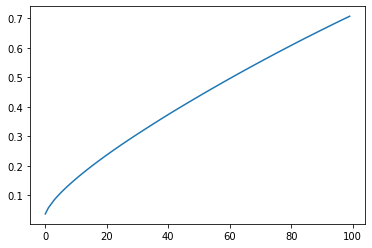

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=min(100, GloVe.shape[1]//2))
V_pca = pca.fit_transform(GloVe)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [52]:
idx_tag = dict()
tag2idx = {tag:n for n, tag in enumerate(set(pos.values()).union({'UNK'}))}
for word in set(tokencounts.keys()).intersection(vocabulary):
  if word in pos:
    idx_tag[voc2idx[word]] = tag2idx[pos[word]]
  else:
    idx_tag[voc2idx[word]] = tag2idx['UNK']

idx = list(idx_tag.keys())
y = np.asarray([idx_tag[i] for i in idx])
s = np.asarray([tokencounts[idx2voc[i]] for i in idx])
assert len(idx) == len(y)
assert len(idx) == len(s)

79 points


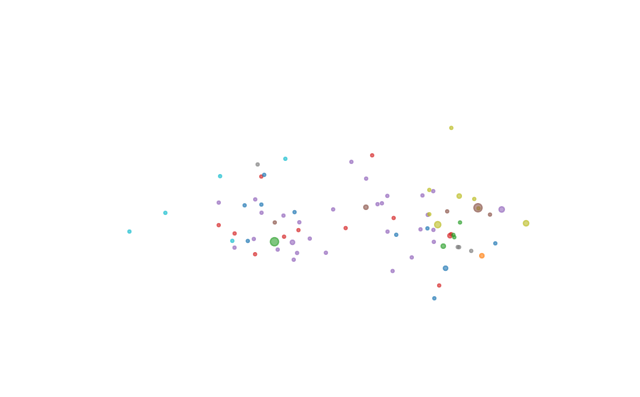

In [54]:
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
# ax.scatter(V_pca[idx, 0], V_pca[idx, 1], V_pca[idx, 2], c=y, cmap='Pastel1', marker='.', alpha=.8)
ax.scatter(V_pca[idx, 0], V_pca[idx, 1], V_pca[idx, 2], c=y, s=s*20, cmap='tab10', marker='.', alpha=.6)
ax.axis('off')
fig.show()

print("%i points" % len(idx))

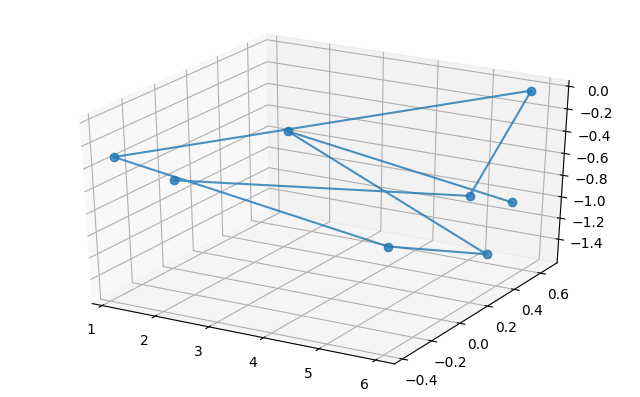

In [55]:
sentence = "This parrot is simply pining for the fjords"
# sentence = "machine learning for language technologists"

words =  [word for word in sentence.lower().split() if word in vocabulary]
d = len(words) - len(sentence.split())
if d > 0:
  print("%i word(s) was not in the vocabulary")
path = np.concatenate([np.vstack(V_pca[voc2idx[word]]).T for word in words])

fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot3D(path[:, 0], path[:, 1], path[:, 2], 'o-', alpha=.8)
# # ax.scatter(X_pca[idx, 0], X_pca[idx, 1], X_pca[idx, 2], c='b', marker='.', alpha=.3)
# # ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='b', cmap='Spectral', alpha=.3)
# # ax.view_init(20, 0)
fig.show()

In [56]:
try:
  from MulticoreTSNE import MulticoreTSNE as TSNE
except:
  !pip install MulticoreTSNE
finally:
  from MulticoreTSNE import MulticoreTSNE as TSNE
import os

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp37-cp37m-linux_x86_64.whl size=68502 sha256=74830b24eb11c2d3b5b9007194dd613ce90b20d85e40600443d636e41bc5efee
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [58]:
tsne = TSNE(n_components=3, n_jobs=os.cpu_count(), verbose=True, metric='cosine')
V_tsne = tsne.fit_transform(GloVe[idx, :])
tsne

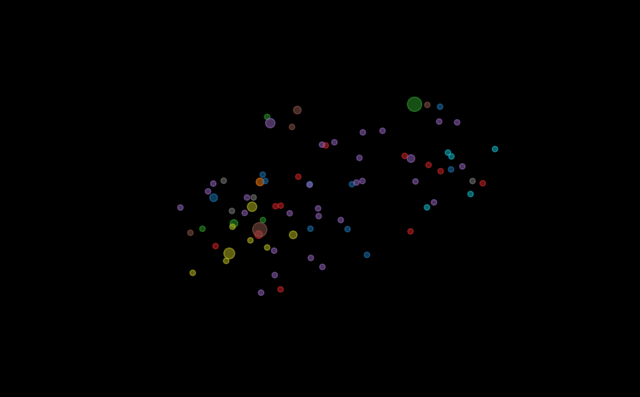

In [64]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(V_tsne[:, 0], V_tsne[:, 1], V_tsne[:, 2], c=y, s=s*60, cmap='tab10', marker='.', alpha=.5)
# ax.scatter(V_tsne[:, 0], V_tsne[:, 1], V_tsne[:, 2], c=y, s=s, cmap='Spectral', marker='.', alpha=.3)
# ax.view_init(20, 20)
ax.axis('off')
fig.show()

In [65]:
try:
  from umap import UMAP
except:
  !pip install umap-learn
finally:
  from umap import UMAP

     |████████████████████████████████| 81kB 3.0MB/s 
     |████████████████████████████████| 1.2MB 7.1MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=0f2077cd3cc89d6178b2acdc84e9056a01787003bdf6e41c3dcfbcc42c3dee63
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=ab89031b3c203666dadec71238b970b89fad40ed8b4609b067d2661c9ebe51ab
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [67]:
umap = UMAP(n_components=3, metric='euclidean')
# umap = UMAP(n_components=3, metric='cosine')
X_umap3 = umap.fit_transform(GloVe[idx, :])

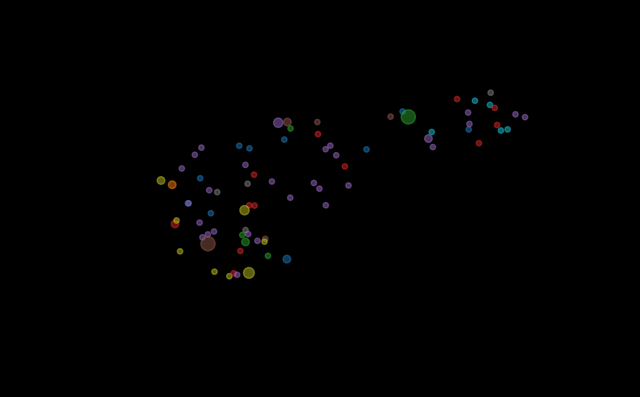

In [68]:
plt.style.use('dark_background')
fig = plt.figure(figsize=(8, 5), dpi=100)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X_umap3[:, 0], X_umap3[:, 1], X_umap3[:, 2], c=y, s=s*60, cmap='tab10', marker='.', alpha=.5)
# ax.scatter(V_tsne[:, 0], V_tsne[:, 1], V_tsne[:, 2], c=y, s=s, cmap='Spectral', marker='.', alpha=.3)
# ax.view_init(20, 20)
ax.axis('off')
fig.show()